# APIs and Importing Data with Python

## Objectives

Today we're going to introduce **APIs**, **JSON**, and, generally speaking, how to scrape data from the web.

## Libraries Used

In [39]:
import pandas as pd

from urllib.request import urlretrieve # Used to save pulled data to computer
import requests # For GET requests
import json # For JSON files

import plotly.offline as p
import plotly.graph_objs as go

p.init_notebook_mode(connected=True)
from IPython.display import Image


## Methods vs Functions vs Attributes

* A **function** is a piece of code that is called by name. It can be passed data to operate on (i.e., the arguments) and can optionally return data (the return value). All data that is passed to a function is explicitly passed.

* **Attributes** are features of an object

* A **method** is a piece of code that is called by name that is associated with an object. In most respects it is identical to a function except for two key differences.

    - It is implicitly passed for the object for which it was called.
    
   

In [ ]:
data.head()

## Introduction

**API** stands for **A**pplication **P**rogram **I**nterface. Effectively, it is a way to make requests and communicate with another server. It provides us a way of collecting data quickly. Rather than go to a **URL** (standing for **Uniform**/**U**niversal **R**esource **L**ocator) and click "Download Dataset," we can simply run a line of code. We will talk about **API**s more below.


#### API Definition

In [44]:
API = 'A set of subroutine definitions, communication protocols, and tools for building software. In general terms, it is a set of clearly defined methods of communication between various components.'


In [45]:
print(API)

A set of subroutine definitions, communication protocols, and tools for building software. In general terms, it is a set of clearly defined methods of communication between various components.


### How HTTPs Operate

Before we can talk about APIs, though, we should first mention HTTP requests and how they work. Most times we type in part of a website, our browser recognizes the HTTP, and we click enter. What we don't think about –– and what is never discussed –– is how we get from *a* to *b*. 

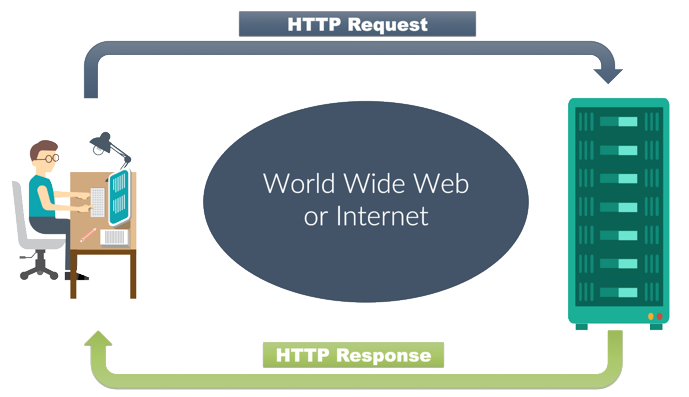

In [40]:
Image(filename = '/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/http_requests.png')


Before moving into **requests** and **response**, we're going to practice importing a **flat file**. What's a **flat file**? A **flat file** is a text file (such as a **.csv**) containing records, or, in other words, table data. You've actually used done this sort of thing before when importing the **Chipotle dataset** from githubusercontent.com.

Here, though, we'll also see how we can save the **Chipotle** file locally to our computer. (Last Thursday we chose not to save.)

In [3]:
url = 'https://raw.githubusercontent.com/TheUpshot/chipotle/master/orders.tsv'
urlretrieve(url, '/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/chipotle.csv')


('/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/chipotle.csv',
 <http.client.HTTPMessage at 0x114ae3dd8>)

What I've written above can also be written as what I've written below:

In [56]:
urlretrieve('https://raw.githubusercontent.com/TheUpshot/chipotle/master/orders.tsv', '/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/chipotle.csv')


In [4]:
chipotle = pd.read_csv('/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/chipotle.csv', sep = '\t')   # tab (\t) separated values 
print('Variable dtypes:\n', chipotle.dtypes, sep = '')
chipotle.head()

Variable dtypes:
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


The 'sep' argument is the **delimiter** that we use.

## Paired Programming –– Refresher

Quickly, using Plotly, make a histogram of **quantity**. ***Hint***: unless you want to get fancy, this effectively requires no **y-axis** argument; the only y-axis argument you might think to include is the **logarithm argument** (which is **type = 'log'**, by the way).

In [82]:
graph = go.Histogram(x = chipotle.quantity)

layout = go.Layout(
                   title = 'Histogram of Quantity',
                   autosize = False,
                   xaxis = dict(
                                # type = 'log',
                                title = 'Quantity Sold',
                                titlefont = dict(
                                family = 'Courier New, monospace',
                                size = 18,
                                color = '#7f7f7f')),
                    yaxis = dict(
                                 type = 'log'))

graph = [graph]

fig = go.Figure(data = graph, layout = layout)
p.iplot(fig)

## What about reading in an .xls (Excel) file from the web?

After all, not all files are **.csv**s. Below we'll import a World Bank dataset on gross savings:

In [84]:
url = 'http://api.worldbank.org/v2/en/indicator/NY.GNS.ICTR.ZS?downloadformat=excel'


Something to note here is that the Excel file is imported as an **ordered dictionary**. Ordered dictionaries are just like regular dictionaries except they remember the order in which the items were inserted. 

In [86]:
urlretrieve(url, '/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/worldbank.xls')


('/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/worldbank.xls',
 <http.client.HTTPMessage at 0x1154ccb38>)

In [7]:
dictionary_data = pd.read_excel(url, sheet_name = None)
type(dictionary_data)

collections.OrderedDict

In [83]:
print(dictionary_data.keys())

odict_keys(['Data', 'Metadata - Countries', 'Metadata - Indicators'])


## Quick Question

How would we slice the dictionary and take a look at the first five observations of the Excel files first sheet –– 'Data'?

In [91]:
dictionary_data['Data'][4:15]

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
4,Afghanistan,AFG,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,-11.789938,0.948123,0.172143,7.616119,15.960059,25.009482,18.195863,16.456760,18.096194,NaN
5,Angola,AGO,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,24.765358,5.199364,23.585098,25.473122,26.032572,21.381410,12.352172,-0.452477,3.049233,NaN
6,Albania,ALB,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.288603,16.479012,22.006056,23.595932,22.124742,17.547770,19.182017,16.829535,14.540693,16.729927
7,Andorra,AND,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,45.199854,31.299830,35.731651,40.414032,38.754601,34.741506,32.641741,24.206595,23.757937,NaN
9,United Arab Emirates,ARE,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Argentina,ARG,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.124548,18.317818,17.321335,17.360137,16.223006,15.205273,15.918644,12.610851,12.403776,13.986620
11,Armenia,ARM,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,30.793826,17.170756,16.433291,14.414495,12.812656,14.455079,13.441345,18.373129,16.623303,18.415211
12,American Samoa,ASM,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Antigua and Barbuda,ATG,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
dictionary_data['Data'].head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,Last Updated Date,2018-07-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.00000,2016.000000,2017.0
3,Aruba,ABW,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Gross savings (% of GDP),NY.GNS.ICTR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,-11.789938,0.948123,0.172143,7.616119,15.960059,25.009482,18.195863,16.45676,18.096194,NaN


### HTTP Requests and HTML

**HTTP** stands for **H**yper **T**ext **T**ransfer **P**rotocol. It is the foundation of data communication for the web. (***Side Note***: **HTTPS** is just a more ***secure*** version  of **HTTP**.) Each time you go to a website, you are making a **HTTP** *request* to the server. We saw that in our illustration before.


#### HTTP Definition

In [48]:
HTTP = "The communications protocol used to connect to Web servers on the Internet or on a local network (intranet). Its primary function is to establish a connection with the server and send HTML pages back to the user's browser."


In [49]:
print(HTTP)

The communications protocol used to connect to Web servers on the Internet or on a local network (intranet). Its primary function is to establish a connection with the server and send HTML pages back to the user's browser.


Below, we're going to *request* the **HTML** from the World Bank website. This *request* is known as a **GET** *request*. It uses the –– wait for it –– ***requests*** package. 

#### API Request Definition

In [68]:
API_request = "A query to a firm or institution's database of products."


In [66]:
print(API_request)

A query to a firm or institution's database of products.


In [ ]:
import requests # Repeat of what is above

Making the **.get()** request: this one command will package the request to the URL, send the request, and catch the response as our *response* variable.

In [95]:
# Going back to Github's Chipotle data:

url = 'https://raw.githubusercontent.com/TheUpshot/chipotle/master/orders.tsv'

response = requests.get(url)

print('Type: ', type(response), '\n')
print('Response:', response, '\n')

Type:  <class 'requests.models.Response'> 

Response: <Response [200]> 



We use the **.text** attribute of our 'Response' object to extract our website's HTML as a *string*.

In [96]:
html = response.text
print('Response text:\n', html)


Response text:
 order_id	quantity	item_name	choice_description	item_price
1	1	Chips and Fresh Tomato Salsa	NULL	$2.39 
1	1	Izze	[Clementine]	$3.39 
1	1	Nantucket Nectar	[Apple]	$3.39 
1	1	Chips and Tomatillo-Green Chili Salsa	NULL	$2.39 
2	2	Chicken Bowl	[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]	$16.98 
3	1	Chicken Bowl	[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]	$10.98 
3	1	Side of Chips	NULL	$1.69 
4	1	Steak Burrito	[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]	$11.75 
4	1	Steak Soft Tacos	[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]	$9.25 
5	1	Steak Burrito	[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]	$9.25 
5	1	Chips and Guacamole	NULL	$4.45 
6	1	Chicken Crispy Tacos	[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream]]	$8.75 
6	1	Chicken Soft Tacos	[

We've just successfully scraped **HTML** data from the web using the **requests** package. In the background, this forms the basis for web browsers themselves. Every time you put in a new URL or click on a link, your computer makes a **get request** for that particular page and then the browser itself renders that page into a visual display on the screen.

Some of you might find this data messy or even useless. Some of it does look a little garbled. On Thursday, we'll see that there is a way of both parsing and extracting **structured data** (i.e., data which is organized in a defined manner). We can do this using **BeautifulSoup**, a Python package created for just this purpose.

Before we go any further, let's briefly discuss **HTML**. **HTML** stands for **H**yper **T**ext **M**arkup **L**anguage. It describes the ***structure*** of our webpages using markup. **HTML** elements are the building blocks of **HTML** pages –– they are represented by tags. Your browser will not display **HTML** tags explicitly, but it will use them to render page's content. A simple **HTML** document might take on the following look.

In [ ]:
<!DOCTYPE html> # Defines the document
<html> # An element
<head> # An element ... and so on
<title>Page Title</title>
</head>
<body>

<h1>My First Heading</h1>
<p>My first paragraph.</p>

</body>
</html>

#### HTML Definition

In [61]:
HTML = 'The standard markup language for creating web pages and web applications.'
print(HTML)

The standard markup language for creating web pages and web applications.


## JSONs

A standard form for ***transferring data*** through **API**s is the **JSON** file format. **JSON**s stands for **J**ava**S**cript **O**bject **N**otation. The good thing about these sort of files is that they can be **read by humans**, unlike what we saw before. I think you'll find that they most remind you of **dictionaries**. And actually, when loading a **JSON** file into Python with the **json.load()** method, we'll find that it's imported as a **dictionary**

#### JSON Definition

In [59]:
JSON = 'An open-standard file format that uses human-readable text to transmit data objects consisting of attribute–value pairs and array data types (or any other serializable value).'


In [60]:
print(JSON)

An open-standard file format that uses human-readable text to transmit data objects consisting of attribute–value pairs and array data types (or any other serializable value).


In [97]:
with open('/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/random_quiz.json') as json_example:
    json_exampdata = json.load(json_example)


In [98]:
type(json_exampdata)

dict

Printing out the **JSON** files **key-value** pairs with the help of a **for-loop**:

In [100]:
for key in json_exampdata.keys():
    print(key + ':', json_exampdata[key])

quiz: {'sport': {'q1': {'question': 'Which one is correct team name in NBA?', 'options': ['New York Bulls', 'Los Angeles Kings', 'Golden State Warriros', 'Huston Rocket'], 'answer': 'Huston Rocket'}}, 'maths': {'q1': {'question': '5 + 7 = ?', 'options': ['10', '11', '12', '13'], 'answer': '12'}, 'q2': {'question': '12 - 8 = ?', 'options': ['1', '2', '3', '4'], 'answer': '4'}}}


## Paired Programming

Take the second JSON file and repeat the following. That is,

1. Open it up; and
    
2. Print out the file's key-value pairs.

In [103]:
with open('/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/json_example.json') as json_example:
    example_data = json.load(json_example)
    
    

In [109]:
type(example_data)

dict

In [114]:
for key in example_data.keys():
    print(key + ':' + example_data[key])

fruit:Apple
size:Large
color:Red


In [13]:
with open('/Users/MattMecca/Documents/Work-related material/Data Folder –– Work-related/City of Baltimore Data.json') as json_example:
    json_exampdata = json.load(json_example)

In [14]:
for elem in json_exampdata.keys():
    print(elem + ':', json_exampdata[elem])

meta: {'view': {'id': 'k5ry-ef3g', 'name': 'Restaurants', 'attribution': 'City of Baltimore', 'attributionLink': 'http://www.baltimorecity.gov', 'averageRating': 0, 'category': 'Culture & Arts', 'createdAt': 1323890441, 'description': 'This dataset contains a list of restaurants within Baltimore City. The accuracy and completeness of this list is unknown.', 'displayType': 'table', 'downloadCount': 22515, 'hideFromCatalog': False, 'hideFromDataJson': False, 'indexUpdatedAt': 1486060407, 'licenseId': 'CC_30_BY', 'newBackend': False, 'numberOfComments': 0, 'oid': 7693223, 'provenance': 'official', 'publicationAppendEnabled': False, 'publicationDate': 1396568385, 'publicationGroup': 260378, 'publicationStage': 'published', 'rowsUpdatedAt': 1396568381, 'rowsUpdatedBy': '6r9a-dfdj', 'tableId': 1533935, 'totalTimesRated': 0, 'viewCount': 15600, 'viewLastModified': 1486356240, 'viewType': 'tabular', 'columns': [{'id': -1, 'name': 'sid', 'dataTypeName': 'meta_data', 'fieldName': ':sid', 'positi

## What is an API? How is different than a JSON? How does an API work?

As we've already discussed, **JSON files** give us the ability to store information in an organized, easy-to-access manner. It gives us a human-readable data collection that we can access in a logical manner (as it displays in the form of a Python dictionary).


An **API**, on the other hand, is the part of a remote server that **receives requests and sends responses**. At their most basic, **API calls** are essentially: retrieve some specific information from the web through a request. All of the complexities are in their *formatting* and what kinds of requests each specific **API** lets you make.

***This is a pretty good example I stole from the WWW***

As an example, say that your company wants to schedule a conference call with another firm and that the interal systems of each is different. In order to schedule the call, you both use Google calendar. This is where **API**s come into play.

Your firm's or their firm's servers would "talk" directly with Google’s server, one or both of them making a request to create an event with the given details. Your server would then receive Google’s response, process it, and send back relevant information to the browser, such as a confirmation email to the meeting's attendees.

But what if I didn't want to go through all that? What if I wanted to try and bypass all the back and forth? Well, in that case, your browser can often just send an API request directly to Google’s server and thus bypass your server.

We can think of APIs as similar to the user interface on our smartphones. These interfaces, though, aren't meant for humans; they're designed for machines. You'll see what I mean by the examples below, I think.

But as for the Google example: Google Calendar's **API** is a bit different from the **API** of other remote servers. That difference is in the format of the **request** and the **response**.

To render the whole web page, your browser expects a **response** in **HTML**, which contains *presentational code*, while **Google Calendar’s API** call would just **return the data** –— likely in a **format like JSON** (the type of file we just covered).

If your **website’s server** is making the **API request**, then your website’s server is the **consumer** (similar to your **browser** being the **consumer** when you use it to navigate to a website). Google, here, is the **provider**.

From your users perspective, **API**s allow them to complete the action *without leaving your website*. Most modern websites consume at least some third-party **API**s.

When a company offers an **API** to their customers, it just means that they’ve built a set of dedicated **URL**s that return *pure data responses* –— meaning the responses **won’t** contain the kind of presentational overhead that you would expect in a graphical user interface like a website.

Can you make these requests with your browser? As we'll see below, most of the time you can. The actual **HTTP** transmission happens in text, and so your browser will always do the best it can to display the **response**. Also below I'll mention the Chrome extensions that you can download in order to improve the **API**s appearance.

## How to connect to an API in Python?

Below we're going to play around with a Pokémon API. This one contains Bulbasaur's data specifically.

In [115]:
url = 'https://pokeapi.co/api/v2/pokemon/1/'

response = requests.get(url)

response.text



'{"forms":[{"url":"https:\\/\\/pokeapi.co\\/api\\/v2\\/pokemon-form\\/1\\/","name":"bulbasaur"}],"abilities":[{"slot":3,"is_hidden":true,"ability":{"url":"https:\\/\\/pokeapi.co\\/api\\/v2\\/ability\\/34\\/","name":"chlorophyll"}},{"slot":1,"is_hidden":false,"ability":{"url":"https:\\/\\/pokeapi.co\\/api\\/v2\\/ability\\/65\\/","name":"overgrow"}}],"stats":[{"stat":{"url":"https:\\/\\/pokeapi.co\\/api\\/v2\\/stat\\/6\\/","name":"speed"},"effort":0,"base_stat":45},{"stat":{"url":"https:\\/\\/pokeapi.co\\/api\\/v2\\/stat\\/5\\/","name":"special-defense"},"effort":0,"base_stat":65},{"stat":{"url":"https:\\/\\/pokeapi.co\\/api\\/v2\\/stat\\/4\\/","name":"special-attack"},"effort":1,"base_stat":65},{"stat":{"url":"https:\\/\\/pokeapi.co\\/api\\/v2\\/stat\\/3\\/","name":"defense"},"effort":0,"base_stat":49},{"stat":{"url":"https:\\/\\/pokeapi.co\\/api\\/v2\\/stat\\/2\\/","name":"attack"},"effort":0,"base_stat":49},{"stat":{"url":"https:\\/\\/pokeapi.co\\/api\\/v2\\/stat\\/1\\/","name":"hp"},

Check it out if we plug this into Chrome.

If we wanted to decode this into something more legible, we'd do the following:

In [116]:
type(response)

requests.models.Response

In [117]:
json_dict = response.json()


In [118]:
type(json_dict)

dict

In [119]:
for k in json_dict.keys():
    print(k + ': ', json_dict[k])

forms:  [{'url': 'https://pokeapi.co/api/v2/pokemon-form/1/', 'name': 'bulbasaur'}]
abilities:  [{'slot': 3, 'is_hidden': True, 'ability': {'url': 'https://pokeapi.co/api/v2/ability/34/', 'name': 'chlorophyll'}}, {'slot': 1, 'is_hidden': False, 'ability': {'url': 'https://pokeapi.co/api/v2/ability/65/', 'name': 'overgrow'}}]
stats:  [{'stat': {'url': 'https://pokeapi.co/api/v2/stat/6/', 'name': 'speed'}, 'effort': 0, 'base_stat': 45}, {'stat': {'url': 'https://pokeapi.co/api/v2/stat/5/', 'name': 'special-defense'}, 'effort': 0, 'base_stat': 65}, {'stat': {'url': 'https://pokeapi.co/api/v2/stat/4/', 'name': 'special-attack'}, 'effort': 1, 'base_stat': 65}, {'stat': {'url': 'https://pokeapi.co/api/v2/stat/3/', 'name': 'defense'}, 'effort': 0, 'base_stat': 49}, {'stat': {'url': 'https://pokeapi.co/api/v2/stat/2/', 'name': 'attack'}, 'effort': 0, 'base_stat': 49}, {'stat': {'url': 'https://pokeapi.co/api/v2/stat/1/', 'name': 'hp'}, 'effort': 0, 'base_stat': 45}]
name:  bulbasaur
weight:  6

Before moving forward, let's deconstruct the **URL**:

The https https://pokeapi.co/api/v2/pokemon/1/ means we're making an HTTPS request. The pokeapi.co/**api**/ indicates that we're querying the Pokémon **API**. 

Another thing we ought to note is that while the URL looks dirty here, it can look a ton more helpful if you simply input it into your browser. Check it out. (***Note***: your's is going to look a bit different than mine because I've downloaded a Google Chrome extension that improves the API display.)


What if we were to come across something a bit more complicated, though? What if were dealt 'http://www.omdbapi.com/?apikey=ff21610b&t=there+will+be+blood', an API derived from the Open Movie Database API, or OMDb. The string here begins with a **question mark**, indicating that it's a ***query string***. **Query strings** are parts of URLs that don't necessarily fit into the traditional hierarchical power structure. They allow for flexibility of our arguments (**ff21610b** and **there+will+be+blood**, here) and help process our requests. Here, we insert an **API key** (mandated by OMDb) of **ff21610b** and request a **title** (**t**) of **there+will+be+blood**. We use the ampersand (**&**) symbol we saw in our last class. The result is as follows:

In [120]:
url = 'http://www.omdbapi.com/?apikey=ff21610b&t=there+will+be+blood'

response = requests.get(url)

response.text

'{"Title":"There Will Be Blood","Year":"2007","Rated":"R","Released":"25 Jan 2008","Runtime":"158 min","Genre":"Drama","Director":"Paul Thomas Anderson","Writer":"Paul Thomas Anderson (written for the screen by), Upton Sinclair (novel)","Actors":"Daniel Day-Lewis, Martin Stringer, Matthew Braden Stringer, Jacob Stringer","Plot":"A story of family, religion, hatred, oil and madness, focusing on a turn-of-the-century prospector in the early days of the business.","Language":"English, American Sign Language","Country":"USA","Awards":"Won 2 Oscars. Another 106 wins & 136 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BMjAxODQ4MDU5NV5BMl5BanBnXkFtZTcwMDU4MjU1MQ@@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"8.1/10"},{"Source":"Rotten Tomatoes","Value":"91%"},{"Source":"Metacritic","Value":"93/100"}],"Metascore":"93","imdbRating":"8.1","imdbVotes":"441,322","imdbID":"tt0469494","Type":"movie","DVD":"08 Apr 2008","BoxOffice":"$40,133,435","Production"

## Quick Question

If I wanted to pull the API for 'Deliverance,' how would I go about it?

In [121]:
movie = response.json()

for key in movie.keys():
    print(key + ':', movie[key])

Title: There Will Be Blood
Year: 2007
Rated: R
Released: 25 Jan 2008
Runtime: 158 min
Genre: Drama
Director: Paul Thomas Anderson
Writer: Paul Thomas Anderson (written for the screen by), Upton Sinclair (novel)
Actors: Daniel Day-Lewis, Martin Stringer, Matthew Braden Stringer, Jacob Stringer
Plot: A story of family, religion, hatred, oil and madness, focusing on a turn-of-the-century prospector in the early days of the business.
Language: English, American Sign Language
Country: USA
Awards: Won 2 Oscars. Another 106 wins & 136 nominations.
Poster: https://m.media-amazon.com/images/M/MV5BMjAxODQ4MDU5NV5BMl5BanBnXkFtZTcwMDU4MjU1MQ@@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '8.1/10'}, {'Source': 'Rotten Tomatoes', 'Value': '91%'}, {'Source': 'Metacritic', 'Value': '93/100'}]
Metascore: 93
imdbRating: 8.1
imdbVotes: 441,322
imdbID: tt0469494
Type: movie
DVD: 08 Apr 2008
BoxOffice: $40,133,435
Production: Paramount Vantage
Website: http://www.therewillbeblood.

In [19]:
url = 'http://www.omdbapi.com/?apikey=ff21610b&t=deliverance'

response = requests.get(url)

response.text

'{"Title":"Deliverance","Year":"1972","Rated":"R","Released":"20 Sep 1972","Runtime":"109 min","Genre":"Adventure, Drama, Thriller","Director":"John Boorman","Writer":"James Dickey (screenplay), James Dickey (novel)","Actors":"Jon Voight, Burt Reynolds, Ned Beatty, Ronny Cox","Plot":"Intent on seeing the Cahulawassee River before it\'s turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they\'ll never forget into the dangerous American back-country.","Language":"English","Country":"USA","Awards":"Nominated for 3 Oscars. Another 3 wins & 10 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BZjBhYzU3NWItOWZjMy00NjI5LWFmYmItZmIyOWFlMDIxMWNiXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"93%"},{"Source":"Metacritic","Value":"82/100"}],"Metascore":"82","imdbRating":"7.7","imdbVotes":"86,511","imdbID":"tt0068473","Type":"movie","DVD":"0

## Quick Question

### Decoding the JSON

These responses, while they're great, are still in the format of **JSON**s. Let's make it more legible.

In [ ]:
url = 'http://www.omdbapi.com/?apikey=ff21610b&t=there+will+be+blood'

# Here we package the request, send the request and catch the response
response = requests.get(url)


**Decode** the JSON data into a dictionary.

It's here that we **decode**:

In [17]:
json_dict = response.json()

# Print each key-value pair in json_data
for key in json_dict.keys():
    print(key + ': ', json_dict[key])

Title:  Deliverance
Year:  1972
Rated:  R
Released:  20 Sep 1972
Runtime:  109 min
Genre:  Adventure, Drama, Thriller
Director:  John Boorman
Writer:  James Dickey (screenplay), James Dickey (novel)
Actors:  Jon Voight, Burt Reynolds, Ned Beatty, Ronny Cox
Plot:  Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous American back-country.
Language:  English
Country:  USA
Awards:  Nominated for 3 Oscars. Another 3 wins & 10 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BZjBhYzU3NWItOWZjMy00NjI5LWFmYmItZmIyOWFlMDIxMWNiXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '93%'}, {'Source': 'Metacritic', 'Value': '82/100'}]
Metascore:  82
imdbRating:  7.7
imdbVotes:  86,511
imdbID:  tt0068473
Type:  movie
DVD:  01 Jun 2004
BoxOffice:  N/A
Produ

## Wikipedia API

Real quick, let's check out the Wikipedia API on John Nash, the founder of game theory's Nash Equilibrium:

Here what we see is **JSON**s within **JSON**s, or **dictionaries** within **dictionaries**. That is the reason for our repeated slicing.

In [122]:
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=John+Forbes+Nash+Jr.'
# Again, we package the request, we send the request, and then we catch the response
response = requests.get(url)

# Decoding the JSON data into a dictionary using the .json() method
json_dict = response.json()

# Printing the Wikipedia page extract
extract_on_johnnash =  json_dict['query']['pages']['102567']['extract']
extract_on_johnnash


'<p class="mw-empty-elt">\n</p>\n<p><b>John Forbes Nash Jr.</b> (June 13, 1928\xa0– May 23, 2015) was an American mathematician who made fundamental contributions to game theory, differential geometry, and the study of partial differential equations. Nash\'s work has provided insight into the factors that govern chance and decision-making inside complex systems found in everyday life.\n</p><p>His theories are widely used in economics. Serving as a Senior Research Mathematician at Princeton University during the latter part of his life, he shared the 1994 Nobel Memorial Prize in Economic Sciences with game theorists Reinhard Selten and John Harsanyi. In 2015, he also shared the Abel Prize with Louis Nirenberg for his work on nonlinear partial differential equations.\n</p><p>John Nash is the only person to be awarded both the Nobel Memorial Prize in Economic Sciences and the Abel Prize.\n</p><p>In 1959, Nash began showing clear signs of mental illness, and spent several years at psychiat

## Paired Programming

What if I wanted the 'extracts' section of Wikipedia's page on 'Game Theory?

In [37]:
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=game+theory'

# Again, we package the request, we send the request, and then we catch the response
response = requests.get(url)

# Decoding the JSON data into a dictionary using the .json() method
json_dict = response.json()

# Printing the Wikipedia page extract
extract_on_gametheory =  json_dict['query']['pages']['11924']['extract']
extract_on_gametheory



'<p class="mw-empty-elt">\n</p>\n\n<p><b>Game theory</b> is the study of mathematical models of strategic interaction between rational decision-makers. It has applications in all fields of social science, as well as in logic and computer science. Originally, it addressed zero-sum games, in which one person\'s gains result in losses for the other participants. Today, game theory applies to a wide range of behavioral relations, and is now an umbrella term for the science of logical decision making in humans, animals, and computers.\n</p><p>Modern game theory began with the idea regarding the existence of mixed-strategy equilibria in two-person zero-sum games and its proof by John von Neumann. Von Neumann\'s original proof used the Brouwer fixed-point theorem on continuous mappings into compact convex sets, which became a standard method in game theory and mathematical economics. His paper was followed by the 1944 book <i>Theory of Games and Economic Behavior</i>, co-written with Oskar Mo

## Fireround –– True or False?

In [123]:
print(API == 'An open-standard file format that uses human-readable text to transmit data objects consisting of attribute–value pairs and array data types (or any other serializable value).')


False


In [124]:
print(JSON == 'An open-standard file format that uses human-readable text to transmit data objects consisting of attribute–value pairs and array data types (or any other serializable value).')


True


In [125]:
print(API == "A query to a firm or institution's database of products.")


False


In [126]:
print(API_request == "A query to a firm or institution's database of products.")


True


In [127]:
print(HTML == "The communications protocol used to connect to Web servers on the Internet or on a local network (intranet).")
      

False


In [128]:
print(HTTP == "The communications protocol used to connect to Web servers on the Internet or on a local network (intranet). Its primary function is to establish a connection with the server and send HTML pages back to the user's browser.")


True


In [130]:
print(API == 'A set of subroutine definitions, communication protocols, and tools for building software. In general terms, it is a set of clearly defined methods of communication between various components.')


True


## Lab

Pull the World Wide Web Wikipedia page, count the number of words in its extract and create a histogram of those words using Plotly.

In [140]:
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=World+Wide+Web'

response = requests.get(url)

WWW_dict = response.json()

WWW_dict = WWW_dict['query']['pages']['33139']['extract']

In [141]:
def wordcount(string = WWW_dict):
    words_dict = {}
    for word in string:
        if word in words_dict.keys():
            words_dict[word] += 1
        else:
            words_dict[word] = 1
    return words_dict
        

In [142]:
words_dict = wordcount()

In [147]:
graph = go.Histogram(x = words_dict)

layout = go.Layout(
                   title = 'Histogram of Quantity',
                   autosize = False,
                   xaxis = dict(
                                # type = 'log',
                                title = 'Quantity Sold',
                                titlefont = dict(
                                family = 'Courier New, monospace',
                                size = 18,
                                color = '#7f7f7f')),
                    #yaxis = dict(
                     #            type = 'log'))
)

graph = [graph]

fig = go.Figure(data = graph, layout = layout)
p.iplot(fig)

ValueError: 
    Invalid value of type 'builtins.dict' received for the 'x' property of histogram
        Received value: {'<': 14, 'p': 37, ' ': 225, 'c': 30, 'l': 41, 'a': 77, 's': 65, '=': 1, '"': 2, 'm': 38, 'w': 21, '-': 4, 'e': 171, 't': 112, 'y': 18, '>': 14, '\n': 10, '/': 7, 'T': 5, 'h': 35, 'b': 37, 'W': 16, 'o': 82, 'r': 84, 'd': 42, 'i': 78, '(': 3, ')': 3, ',': 17, 'n': 93, 'f': 15, 'u': 25, 'U': 2, 'R': 4, 'L': 5, 'k': 5, 'x': 4, 'v': 10, 'I': 5, '.': 11, 'E': 4, 'g': 19, 'B': 1, '1': 8, '9': 10, '8': 1, 'H': 3, '0': 1, 'C': 2, 'N': 2, 'S': 1, 'z': 1, 'J': 1, 'A': 2, 'M': 3, "'": 1}

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [158]:
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=World+Wide+Web'

# Again, we package the request, we send the request, and then we catch the response
response = requests.get(url)

# Decoding the JSON data into a dictionary using the .json() method
json_dict = response.json()

# Printing the Wikipedia page extract
extract_WWW =  json_dict['query']['pages']['33139']['extract']
extract_WWW


'<p class="mw-empty-elt">\n\n</p>\n\n<p>The <b>World Wide Web</b> (<b>WWW</b>), also called <b>the Web</b>, is an information space where documents and other web resources are identified by Uniform Resource Locators (URLs), interlinked by hypertext links, and accessible via the Internet. English scientist Tim Berners-Lee invented the World Wide Web in 1989. He wrote the first web browser in 1990 while employed at CERN in Switzerland. The browser was released outside CERN in 1991, first to other research institutions starting in January 1991 and to the general public on the Internet in August 1991.\n</p><p>The World Wide Web has been central to the development of the Information Age and is the primary tool billions of people use to interact on the Internet. Web pages are primarily text documents formatted and annotated with Hypertext Markup Language (HTML). In addition to formatted text, web pages may contain images, video, audio, and software components that are rendered in the user\'s

### Cleaning the Data

In [159]:
extract_WWW = extract_WWW.lower().replace('\n', ' ').replace('class="mw-empty-elt"', '').replace('>', '').replace('/', '').replace('<', '').replace('(', '').replace(')', '').split(' ')
extract_WWW.pop()
extract_WWW = list(filter(None, extract_WWW))

extract_WWW

['p',
 'p',
 'pthe',
 'bworld',
 'wide',
 'webb',
 'bwwwb,',
 'also',
 'called',
 'bthe',
 'webb,',
 'is',
 'an',
 'information',
 'space',
 'where',
 'documents',
 'and',
 'other',
 'web',
 'resources',
 'are',
 'identified',
 'by',
 'uniform',
 'resource',
 'locators',
 'urls,',
 'interlinked',
 'by',
 'hypertext',
 'links,',
 'and',
 'accessible',
 'via',
 'the',
 'internet.',
 'english',
 'scientist',
 'tim',
 'berners-lee',
 'invented',
 'the',
 'world',
 'wide',
 'web',
 'in',
 '1989.',
 'he',
 'wrote',
 'the',
 'first',
 'web',
 'browser',
 'in',
 '1990',
 'while',
 'employed',
 'at',
 'cern',
 'in',
 'switzerland.',
 'the',
 'browser',
 'was',
 'released',
 'outside',
 'cern',
 'in',
 '1991,',
 'first',
 'to',
 'other',
 'research',
 'institutions',
 'starting',
 'in',
 'january',
 '1991',
 'and',
 'to',
 'the',
 'general',
 'public',
 'on',
 'the',
 'internet',
 'in',
 'august',
 '1991.',
 'ppthe',
 'world',
 'wide',
 'web',
 'has',
 'been',
 'central',
 'to',
 'the',
 'develo

In [160]:
def wordcount(string):
    wordcount = {}
    for word in string:
        if word in wordcount.keys():
            wordcount[word] += 1
        else:
            wordcount[word] = 1
    return wordcount

In [206]:
extract_count = wordcount(extract_WWW)
type(extract_count)

dict

In [207]:
extract_count = pd.DataFrame.from_dict(extract_count, orient='index', columns=['values'])
extract_count = extract_count.reset_index()
extract_count.columns = ['key', 'value']
extract_count.head()

,key,value
0,p,3
1,pthe,1
2,bworld,1
3,wide,3
4,webb,1


Not sure why I can't get this histogram to function properly. I'll take a deeper dive some other time.

In [208]:
graph = go.Histogram(x = extract_count.key, y = extract_count.value)

layout = go.Layout(
                   title = 'Count Histogram',
                   xaxis = dict(autorange = False,
                                # type = 'log',
                                title = 'Number of Words',
                                titlefont = dict(
                                family = 'Courier New, monospace',
                                size = 18,
                                color = '#7f7f7f')),
                   yaxis = dict(autorange = False))

graph = [graph]

fig = go.Figure(data = graph, layout = layout)
p.iplot(fig)